In [1]:
# pip install jupyterthemes --user
# !jupyter --version
# !pip install jupyterthemes
# !pip install --upgrade jupyterthemes
# !jt -t monokai -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T

In [70]:
pd.set_option('display.max_columns', None)

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

# pd.set_option('max_columns', 400)

# For plotting
from itertools import cycle

plt.style.use('ggplot')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Load in the Dataset and Parse Tweet Text

In [4]:
tweets = pd.read_csv('E:\\Raw Data\\Tweets\\tweets.csv')

In [5]:
tweets.shape

(1048575, 5)

In [6]:
print(tweets.tweet_text[0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [7]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1.482550e+18,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1.482550e+18,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1.482550e+18,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1.482550e+18,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1.482550e+18,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [8]:
# SERIES.DT.DATE
# Series.dt can be used to access the values of the series as datetimelike and return several properties. 
# Pandas Series.dt.date attribute return a numpy array of python datetime.date objects.
# ex.  
# Creating the Series
# sr = pd.Series(['2012-10-21 09:30', '2019-7-18 12:30', '2008-02-2 10:30',
#                '2010-4-22 09:25', '2019-11-8 02:22'])
# # Creating the index
# idx = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
# # set the index
# sr.index = idx
# # Convert the underlying data to datetime 
# sr = pd.to_datetime(sr)
# # Print the series
# # return the date
# result = sr.dt.date
# returns df with only dates  

In [9]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    # adding as new column with wordle id
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    # getting the no. of attempts on the tweet
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    # getting the id number separately
    return tweets

tweets = process_tweets(tweets)

In [10]:
# tweets.head()

# How many tweets do we have for each date

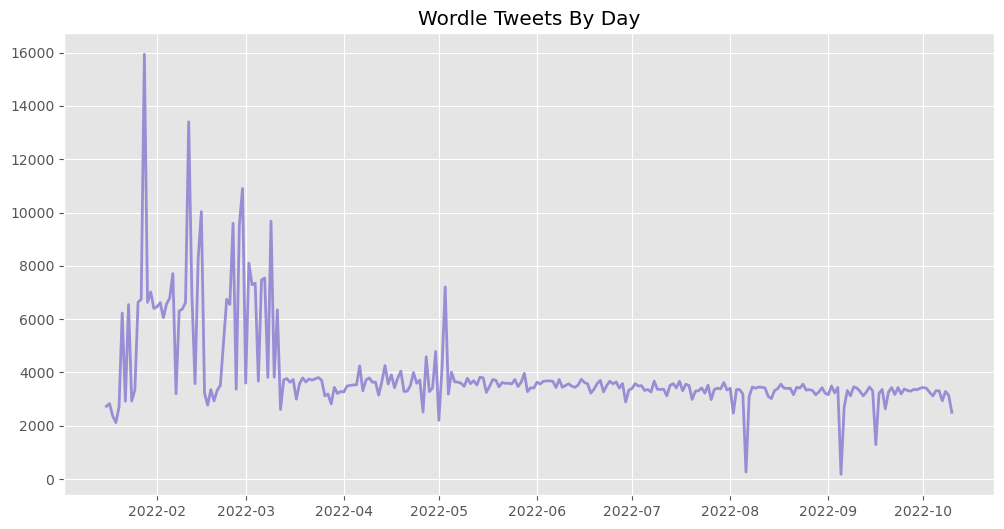

In [11]:
tweets['tweet_date'].value_counts() \
    .plot(figsize=(12,6), title="Wordle Tweets By Day",
         color=color_pal[2], lw=2)
plt.show()

# Number of Attempts Analysis

In [12]:
# tweets.groupby('wordle_id')['n_attempts'].value_counts()
# it's sorta stacked with a multi index, we wanna flip the number of attempts so that it looks like,
# n_attempts 6  5  4  3  2  1
tweets.groupby('wordle_id')['n_attempts'].value_counts() \
    .unstack() \
    .style.background_gradient(axis=1)


n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## How many attempts does it usually take to solve ?

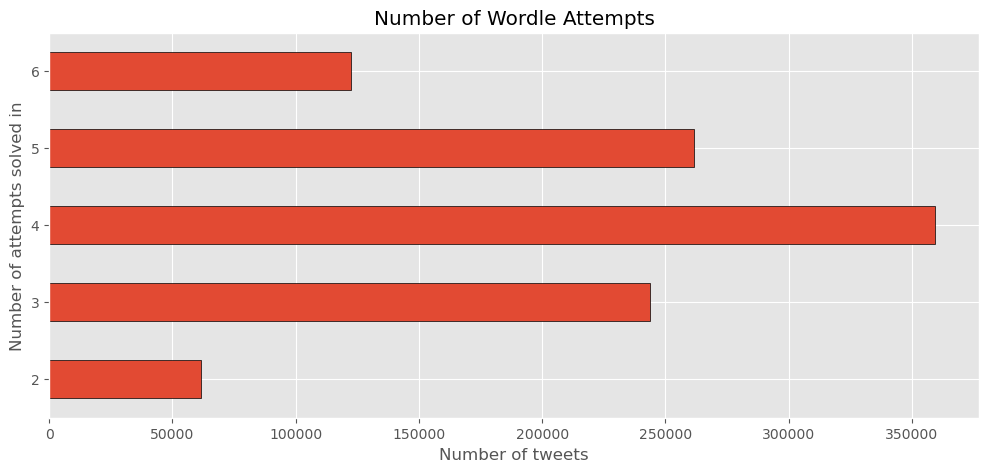

In [13]:
ax = tweets['n_attempts'].value_counts() \
    .sort_index() \
    .plot(figsize=(12,5),
         kind='barh',
         title="Number of Wordle Attempts",
         edgecolor='black')
ax.set_xlabel('Number of tweets')
ax.set_ylabel('Number of attempts solved in')
plt.show()

## Parse Tweet Text

In [14]:
# print(tweets["tweet_text"][4]) ,,, works the same as below with .VALUES[]
print(tweets["tweet_text"].values[0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [15]:
# Make dark squares consistent!
tweets["tweet_text"] = tweets["tweet_text"].str.replace('⬜','⬛')

In [87]:
tweets["tweet_text"].str.split('\n')[8]
# there are a total of 6 attempts and 8 total elements in list

['Wordle 210 2/6', '', '🟨🟩⬛🟩🟨', '🟩🟩🟩🟩🟩', '', 'Got lucky lol']

In [45]:
def parse_tweet_text(tweets):
 
    for n in range(6):
        # Guess number
        n = n + 1
        # tweets["tweet_text"] .str.split('\n')[0]  --- GIves the first element 
        tweets[f'has_guess{n}'] = tweets["tweet_text"].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟩','⬛','🟨']), na=False)
        # tweets['has_guess1'].value_counts() ,,,, has 1048575

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                    tweets["tweet_text"].str.split('\n').str[n+1].str[:5]
        
        # Count number of CORRECT, MISPLACED and INCORRECT
        # tweets["tweet_text"].str.split('\n').str[n+1].str[:5].str.count('⬛')
        
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_misplaced'] = tweets[f'guess{n}'].str.count('🟨')
        
        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets

tweets = parse_tweet_text(tweets)

In [90]:
tweets["additional_text"] = \
        tweets.loc[~tweets['tweet_text'].str.split("\n").str[-1].str.contains('🟩')] \
        ['tweet_text'].str.split("\n").str[-1]

# above line gets the last string of the list which does not contain a green box, brilliant!

In [102]:
# tweets["additional_text"]
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_correct,guess1_misplaced,final_guess,has_guess2,guess2,guess2_incorrect,guess2_correct,guess2_misplaced,has_guess3,guess3,guess3_incorrect,guess3_correct,guess3_misplaced,has_guess4,guess4,guess4_incorrect,guess4_correct,guess4_misplaced,has_guess5,guess5,guess5_incorrect,guess5_correct,guess5_misplaced,has_guess6,guess6,guess6_incorrect,guess6_correct,guess6_misplaced,additional_text
0,Wordle 210,1.482550e+18,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,3,0,2,NaN,True,🟩⬛⬛⬛⬛,4.0,1.0,0.0,True,🟩🟩🟨⬛⬛,2.0,2.0,1.0,True,🟩🟩🟩🟩🟩,0.0,5.0,0.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,Wordle 210,1.482550e+18,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,🟩🟩🟨🟨⬛,1.0,2.0,2.0,True,🟩🟩⬛🟩🟨,1.0,3.0,1.0,True,🟩🟩🟩🟩🟩,0.0,5.0,0.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,Wordle 210,1.482550e+18,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬛⬛⬛🟨⬛,4,0,1,NaN,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,5.0,0.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,Wordle 210,1.482550e+18,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬛⬛🟨⬛⬛,4,0,1,NaN,True,🟨🟨⬛⬛⬛,3.0,0.0,2.0,True,🟩🟩🟩🟩🟩,0.0,5.0,0.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,Wordle 210,1.482550e+18,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,4,0,1,NaN,True,🟩🟩🟩⬛⬛,2.0,3.0,0.0,True,🟩🟩🟩🟩🟩,0.0,5.0,0.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


# Plot Results BY Attempt

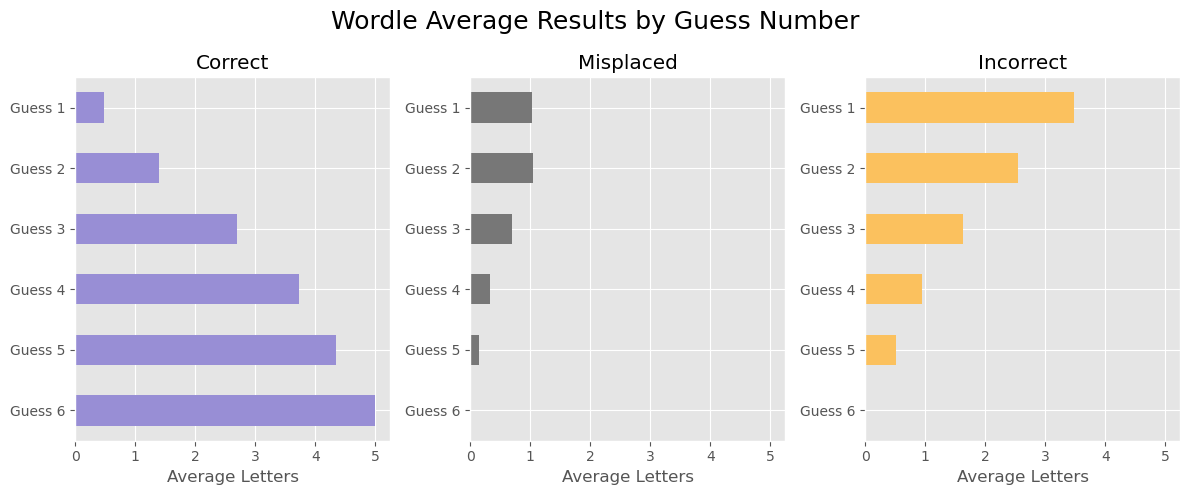

In [142]:
fig, axs = plt.subplots(1,3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct', '_misplaced','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
                title=f'{x.strip("_").replace("_","").title()}',
                ax = axs[i],
                color=color_pal[i+2])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()

In [143]:
answer_dict = {252 : 'SPILL',
     251 : 'VIVID',
     250 : 'BLOKE',
     249 : 'TROVE',
     248 : 'THORN',
     247 : 'OTHER',
     246 : 'TACIT',
     245 : 'SWILL',
     244 : 'DODGE',
     243 : 'SHAKE',
     242 : 'CAULK',
     241 : 'AROMA',
     240 : 'CYNIC',
     239 : 'ROBIN',
     238 : 'ULTRA',
     237 : 'ULCER',
     236 : 'PAUSE',
     235 : 'HUMOR',
     234 : 'FRAME',
     233 : 'ELDER',
     232 : 'SKILL',
     231 : 'ALOFT',
     230 : 'PLEAT',
     229 : 'SHARD',
     228 : 'MOIST',
     227 : 'THOSE',
     204 : 'GORGE',
     205 : 'QUERY',
     206 : 'DRINK',
     207 : 'FAVOR',
     208 : 'ABBEY',
     209 : 'TANGY',
     210 : 'PANIC',
     211 : 'SOLAR',
     212 : 'SHIRE',
     213 : 'PROXY',
     214 : 'POINT',
     215 : 'ROBOT',
     216 : 'PRICK',
     217 : 'WINCE',
     218 : 'CRIMP',
     219 : 'KNOLL',
     220 : 'SUGAR',
     221 : 'WHACK',
     222 : 'MOUNT',
     223 : 'PERKY',
     224 : 'COULD',
     225 : 'WRUNG',
     226 : 'LIGHT',
}

In [146]:
tweets['answer'] = tweets['id'].map(answer_dict)

In [200]:
first_guess_correct = []
for i, d in tweets.dropna(subset=['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer'] 
    results = [x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letters = [example_solution[a] for a in results]
    first_guess_correct += first_guess_letters

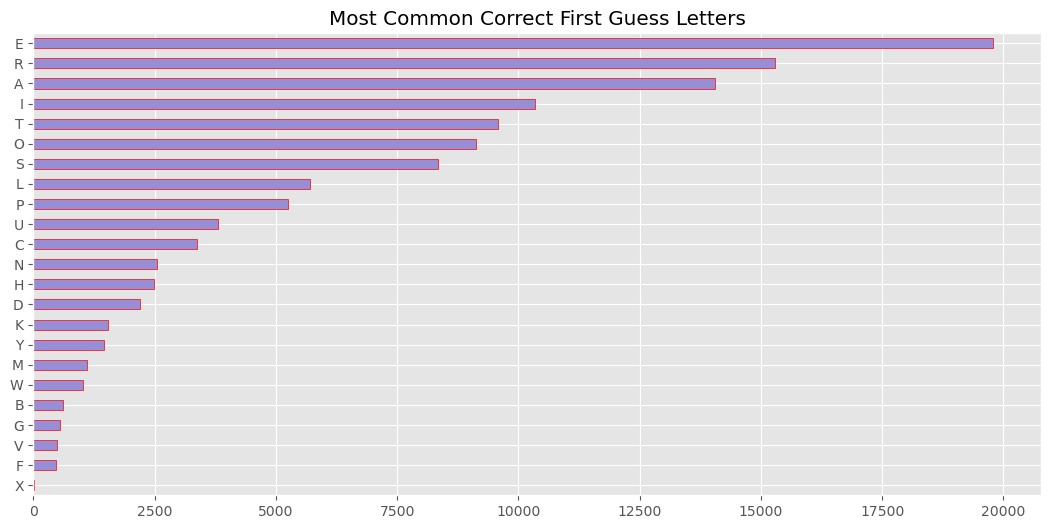

In [233]:
# first_guess_correct
# turn this into a series so that we can perform manipulations on this
pd.Series(first_guess_correct).value_counts(ascending=True) \
    .plot(kind='barh', figsize=(13,6), title='Most Common Correct First Guess Letters',
         edgecolor='red', color=color_pal[2])
plt.show()

# The End